# Technical Indicators (RSI, MACD, Bollinger)

## Download and load the stock data using yfinance

In [1]:
import yfinance as yf
dataset = yf.download('NAUKRI.NS', period='1y')
dataset.head()

/var/folders/jx/cc9brgl143z9wt4bc65wylz40000gn/T/ipykernel_67068/2669847952.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dataset = yf.download('NAUKRI.NS', period='1y')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NAUKRI.NS,NAUKRI.NS,NAUKRI.NS,NAUKRI.NS,NAUKRI.NS
Date,,,,,
2024-11-25,1632.136841,1654.979886,1596.428203,1596.428203,2668425
2024-11-26,1642.542603,1660.556158,1623.314108,1639.844088,1295245
2024-11-27,1661.512329,1665.734410,1638.380347,1643.030665,1207120
2024-11-28,1633.461182,1673.829984,1628.293040,1657.768110,1275315
2024-11-29,1644.086182,1652.520376,1615.786181,1634.705927,1418705


In [2]:
dataset['Close'].diff()

Ticker,NAUKRI.NS
Date,
2024-11-25,NaN
2024-11-26,10.405762
2024-11-27,18.969727
2024-11-28,-28.051147
2024-11-29,10.625000
...,...
2025-11-19,37.234375
2025-11-20,3.194458
2025-11-21,-22.599976


## Calculate gains & loss based on close

In [3]:
dataset['Change'] = dataset['Close'].diff()
dataset

Price,Close,High,Low,Open,Volume,Change
Ticker,NAUKRI.NS,NAUKRI.NS,NAUKRI.NS,NAUKRI.NS,NAUKRI.NS,
Date,,,,,,
2024-11-25,1632.136841,1654.979886,1596.428203,1596.428203,2668425,NaN
2024-11-26,1642.542603,1660.556158,1623.314108,1639.844088,1295245,10.405762
2024-11-27,1661.512329,1665.734410,1638.380347,1643.030665,1207120,18.969727
2024-11-28,1633.461182,1673.829984,1628.293040,1657.768110,1275315,-28.051147
2024-11-29,1644.086182,1652.520376,1615.786181,1634.705927,1418705,10.625000
...,...,...,...,...,...,...
2025-11-19,1359.805542,1361.602427,1315.683283,1322.571179,862715,37.234375
2025-11-20,1363.000000,1371.584859,1354.415141,1371.584859,729780,3.194458


In [4]:
dataset['Gain'] = dataset['Change'].clip(lower=0)
dataset['Loss'] = dataset['Change'].clip(upper=0)
dataset

Price,Close,High,Low,Open,Volume,Change,Gain,Loss
Ticker,NAUKRI.NS,NAUKRI.NS,NAUKRI.NS,NAUKRI.NS,NAUKRI.NS,,,
Date,,,,,,,,
2024-11-25,1632.136841,1654.979886,1596.428203,1596.428203,2668425,NaN,NaN,NaN
2024-11-26,1642.542603,1660.556158,1623.314108,1639.844088,1295245,10.405762,10.405762,0.000000
2024-11-27,1661.512329,1665.734410,1638.380347,1643.030665,1207120,18.969727,18.969727,0.000000
2024-11-28,1633.461182,1673.829984,1628.293040,1657.768110,1275315,-28.051147,0.000000,-28.051147
2024-11-29,1644.086182,1652.520376,1615.786181,1634.705927,1418705,10.625000,10.625000,0.000000
...,...,...,...,...,...,...,...,...
2025-11-19,1359.805542,1361.602427,1315.683283,1322.571179,862715,37.234375,37.234375,0.000000
2025-11-20,1363.000000,1371.584859,1354.415141,1371.584859,729780,3.194458,3.194458,0.000000


## Calcualte avg_gain & avg_loss

In [5]:
avg_gain = dataset['Gain'].rolling(14).mean()
avg_loss = dataset['Loss'].rolling(14).mean()
avg_gain, avg_loss

(Date
 2024-11-25         NaN
 2024-11-26         NaN
 2024-11-27         NaN
 2024-11-28         NaN
 2024-11-29         NaN
                 ...   
 2025-11-19    7.130301
 2025-11-20    7.358477
 2025-11-21    7.358477
 2025-11-24    7.779907
 2025-11-25    7.779907
 Name: Gain, Length: 251, dtype: float64,
 Date
 2024-11-25         NaN
 2024-11-26         NaN
 2024-11-27         NaN
 2024-11-28         NaN
 2024-11-29         NaN
                 ...   
 2025-11-19   -8.691842
 2025-11-20   -8.278285
 2025-11-21   -8.559204
 2025-11-24   -7.068970
 2025-11-25   -8.090402
 Name: Loss, Length: 251, dtype: float64)

## Calculate RSI

In [8]:
rs = avg_gain / avg_loss
dataset['RSI'] = 100 - (100/(1+rs))
dataset['RSI'].max(), dataset['RSI'].min()

(np.float64(56049.392165691774), np.float64(-129120.0734394079))

### Plotting RSI

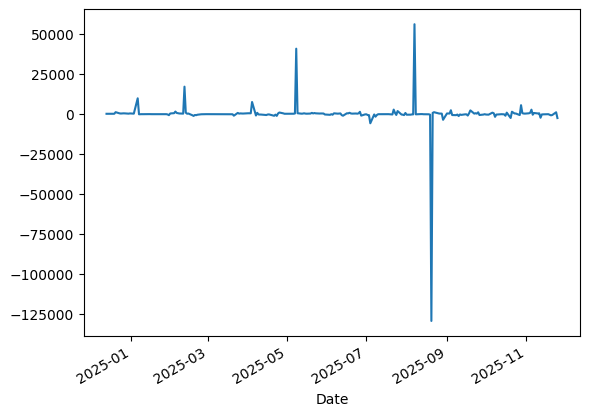

In [7]:
import matplotlib.pyplot as plt
dataset['RSI'].plot()
plt.show()